In [182]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns

In [183]:
%matplotlib inline

In [184]:
plt.rcParams['figure.figsize'] = (20, 20)

In [185]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [186]:
#importing data
df_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
df_rater.head()





Review #     Brand                                            Variety  \
0      2700     Vedan                    Jhen Mian Tang Spicy Hot Noodle   
1      2699     Myojo                        Chicken Shio Wanton Noodles   
2      2698    Nissin  Cup Noodles Chilli Crab Flavour (More Crabtastic)   
3      2697  Maruchan  Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...   
4      2696  Nongshim                  Neoguri Spicy Seafood Noodle Soup   

  Style        Country Stars Top Ten  
0  Pack         Taiwan     4     NaN  
1  Bowl          Japan   4.5     NaN  
2   Cup      Singapore     4     NaN  
3  Bowl  United States  3.25     NaN  
4   Cup  United States     5     NaN

In [187]:
def clean_up_stars(x):
    try :
        return float(x)
    except:
        return np.nan 
df_rater["cleanstars"]=df_rater.Stars.apply(clean_up_stars)
df_rater.head()

Review #     Brand                                            Variety  \
0      2700     Vedan                    Jhen Mian Tang Spicy Hot Noodle   
1      2699     Myojo                        Chicken Shio Wanton Noodles   
2      2698    Nissin  Cup Noodles Chilli Crab Flavour (More Crabtastic)   
3      2697  Maruchan  Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...   
4      2696  Nongshim                  Neoguri Spicy Seafood Noodle Soup   

  Style        Country Stars Top Ten  cleanstars  
0  Pack         Taiwan     4     NaN        4.00  
1  Bowl          Japan   4.5     NaN        4.50  
2   Cup      Singapore     4     NaN        4.00  
3  Bowl  United States  3.25     NaN        3.25  
4   Cup  United States     5     NaN        5.00

In [188]:
#finding data columns
df_rater.columns



Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten',
       'cleanstars'],
      dtype='object')

In [189]:
#finding data type
df_rater.dtypes


Review #        int64
Brand          object
Variety        object
Style          object
Country        object
Stars          object
Top Ten        object
cleanstars    float64
dtype: object

In [190]:
#value count of Brands
df_rater["Brand"].value_counts()

Nissin               399
Nongshim             103
Maruchan              81
Myojo                 72
Mama                  71
                    ... 
President              1
La Moderna             1
Tokachimen Koubou      1
Kimura                 1
Westbrae               1
Name: Brand, Length: 369, dtype: int64

In [191]:
#value count of Country
df_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [192]:
#value count of packaging style
type_ramen= df_rater["Style"].value_counts()

print(type_ramen)

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64


In [193]:
df_rater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review #    2700 non-null   int64  
 1   Brand       2700 non-null   object 
 2   Variety     2700 non-null   object 
 3   Style       2698 non-null   object 
 4   Country     2700 non-null   object 
 5   Stars       2700 non-null   object 
 6   Top Ten     41 non-null     object 
 7   cleanstars  2688 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 168.9+ KB


## Word Cloud of Ramen Flavours

In [194]:
#WordCloud
Text = df_rater['Variety']
Text.head()



0                      Jhen Mian Tang Spicy Hot Noodle
1                          Chicken Shio Wanton Noodles
2    Cup Noodles Chilli Crab Flavour (More Crabtastic)
3    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
4                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [195]:
list_of_variety = Text.to_list()



In [196]:
texts= list_of_variety[0]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(texts)))

There are 82856 words in the combination of all reviewed ramen flavours.


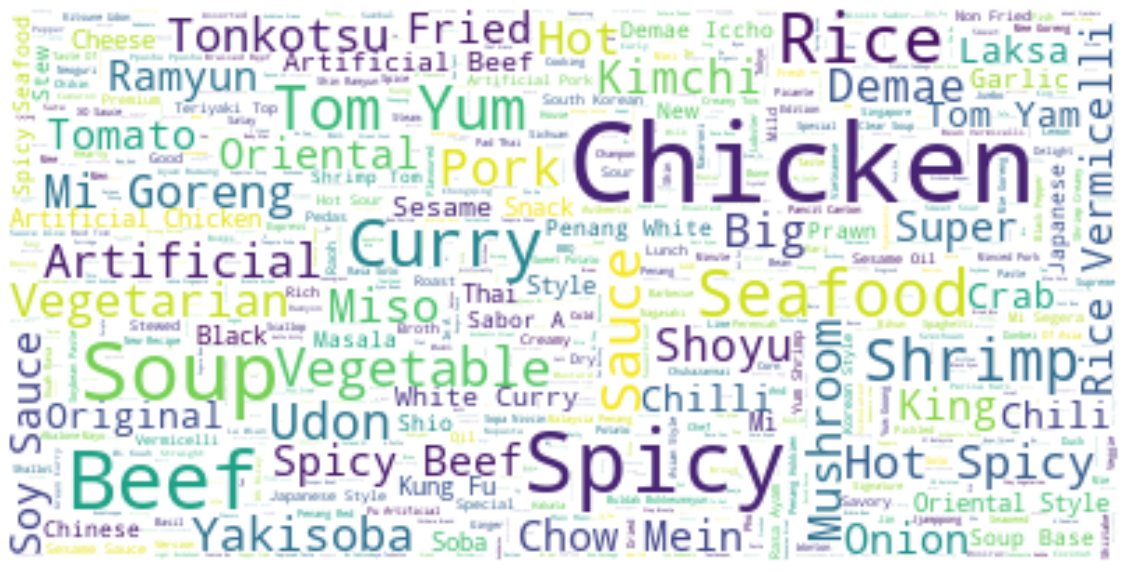

In [197]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size=0.5, max_font_size=40, max_words= 82856, min_word_length=0, stopwords=set(["Instant","Ramen","Flavored","Cup","Instant Noodle", "Noodle","Noodles","With","Flavour","Flavor","Bowl"])).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [198]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [199]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [200]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [201]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

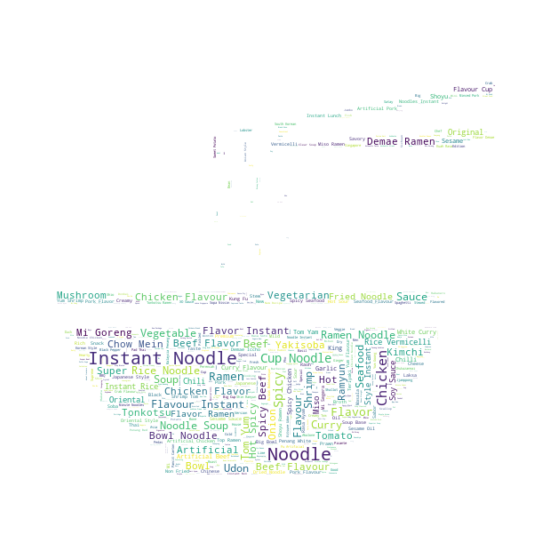

In [202]:
wc = WordCloud(background_color="white", max_words=82856, min_font_size= 1
, max_font_size=20, mask=transformed_bowl_mask)

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

# Value Count of Each Country Lollipop Graph 

In [203]:
df_copy = df_rater.copy()
df_copy.head()

Review #     Brand                                            Variety  \
0      2700     Vedan                    Jhen Mian Tang Spicy Hot Noodle   
1      2699     Myojo                        Chicken Shio Wanton Noodles   
2      2698    Nissin  Cup Noodles Chilli Crab Flavour (More Crabtastic)   
3      2697  Maruchan  Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...   
4      2696  Nongshim                  Neoguri Spicy Seafood Noodle Soup   

  Style        Country Stars Top Ten  cleanstars  
0  Pack         Taiwan     4     NaN        4.00  
1  Bowl          Japan   4.5     NaN        4.50  
2   Cup      Singapore     4     NaN        4.00  
3  Bowl  United States  3.25     NaN        3.25  
4   Cup  United States     5     NaN        5.00

In [204]:
df_copy.dtypes

Review #        int64
Brand          object
Variety        object
Style          object
Country        object
Stars          object
Top Ten        object
cleanstars    float64
dtype: object

In [205]:
star_country = df_copy.groupby('Country')

In [206]:
d2 = star_country['Review #'].count().to_frame(name= 'Avg Star Rate').reset_index()

In [207]:
d2

Country  Avg Star Rate
0       Australia             22
1      Bangladesh              7
2          Brazil              5
3        Cambodia              5
4          Canada             41
5           China            175
6        Colombia              6
7           Dubai              3
8         Estonia              2
9            Fiji              4
10        Finland              3
11        Germany             27
12          Ghana              2
13        Holland              4
14      Hong Kong            144
15        Hungary              9
16          India             39
17      Indonesia            141
18          Japan            381
19       Malaysia            158
20         Mexico             25
21        Myanmar             14
22          Nepal             14
23    Netherlands             15
24        Nigeria              2
25       Pakistan              9
26    Philippines             47
27     Phlippines              1
28         Poland              4
29        Sarawak              3
30      Singapore            122
31    South Korea            326
32         Sweden              3
33         Taiwan            229
34       Thailand            191
35             UK             69
36  United States            340
37        Vietnam            108

In [208]:
# create data
a= d2['Country']
b=d2['Avg Star Rate']

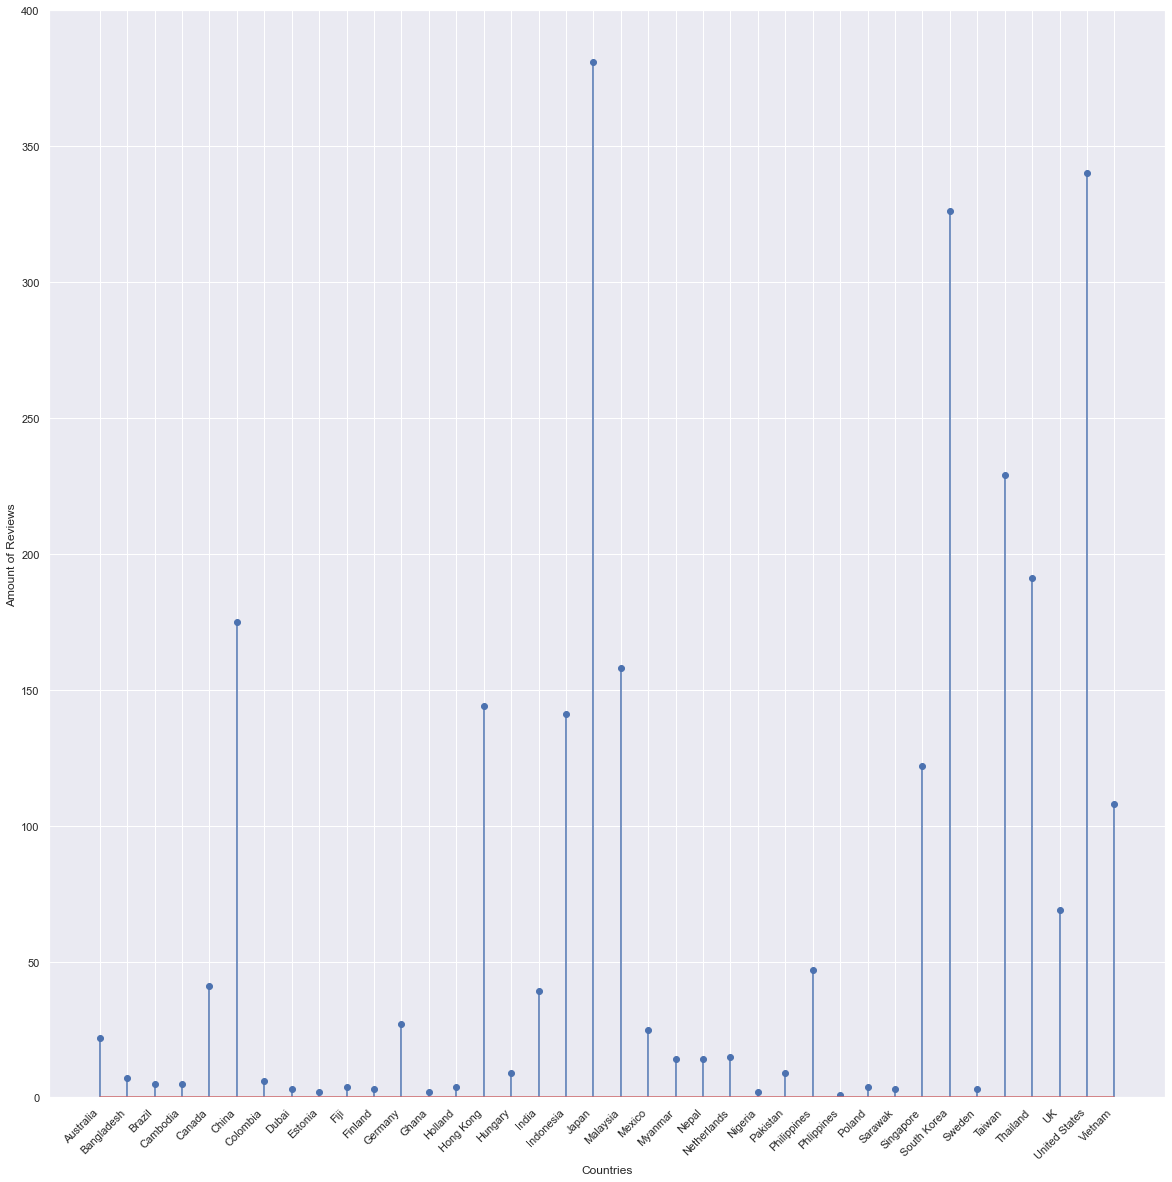

In [239]:
# stem function
ax=plt.stem(a, b)
plt.ylim(0, 400)


plt.xticks(rotation=45, ha='right')
plt.xlabel("Countries")
plt.ylabel("Amount of Reviews")
plt.show()
 

# Bar Graph of Australia, Philiphines, India, UK and Mexico`s Ramen Ratings

In [210]:
country = df_rater.groupby('Country')
country.nunique()




Review #  Brand  Variety  Style  Stars  Top Ten  cleanstars
Country                                                                   
Australia            22      5       22      2     11        0          11
Bangladesh            7      3        7      1      3        0           3
Brazil                5      1        5      2      4        0           4
Cambodia              5      2        5      1      3        0           3
Canada               41      9       41      3     15        0          15
China               175     34      162      4     21        1          21
Colombia              6      1        6      2      5        0           5
Dubai                 3      1        3      1      2        0           2
Estonia               2      1        2      1      2        0           2
Fiji                  4      2        4      1      3        0           3
Finland               3      1        3      1      2        0           2
Germany              27      4       27      2      8        0           8
Ghana                 2      2        2      1      1        0           1
Holland               4      1        4      1      2        0           2
Hong Kong           144     12      143      4     16        1          16
Hungary               9      4        8      1      6        0           6
India                39      9       37      2     12        0          12
Indonesia           141     21      139      3     14        5          14
Japan               381     62      361      5     22        6          21
Malaysia            158     32      150      4     15        6          14
Mexico               25      4       25      2      6        0           6
Myanmar              14      2       14      2      5        1           5
Nepal                14      1       14      1      7        0           7
Netherlands          15      4       15      2     10        0          10
Nigeria               2      1        2      1      2        0           2
Pakistan              9      3        9      1      7        0           7
Philippines          47      5       47      3     15        0          15
Phlippines            1      1        1      1      1        0           1
Poland                4      2        4      1      2        0           2
Sarawak               3      2        3      1      2        0           2
Singapore           122     10      115      3     13        7          13
South Korea         326     36      303      4     24        6          23
Sweden                3      2        3      1      3        0           3
Taiwan              229     49      227      4     25        2          25
Thailand            191     25      178      4     23        3          23
UK                   69     12       69      3     16        0          16
United States       340     52      332      8     28        1          21
Vietnam             108     19      106      4     20        0          20

# Australia

Review #      Brand Style    Country  \
Variety                                                                      
Noodles Chicken & Corn Flavour            2349  Fantastic   Cup  Australia   
Noodles Chicken Chow Mein Flavour         2308  Fantastic   Cup  Australia   
Noodle With Oriental Chicken Flavour      2301     Suimin   Cup  Australia   
Noodles With Chicken Flavour              2296     Suimin   Cup  Australia   
Noodles Beef Flavour                      2285  Fantastic   Cup  Australia   

                                     Stars Top Ten  cleanstars  
Variety                                                         
Noodles Chicken & Corn Flavour        2.75     NaN        2.75  
Noodles Chicken Chow Mein Flavour      3.5     NaN        3.50  
Noodle With Oriental Chicken Flavour  2.75     NaN        2.75  
Noodles With Chicken Flavour           2.5     NaN        2.50  
Noodles Beef Flavour                     3     NaN        3.00

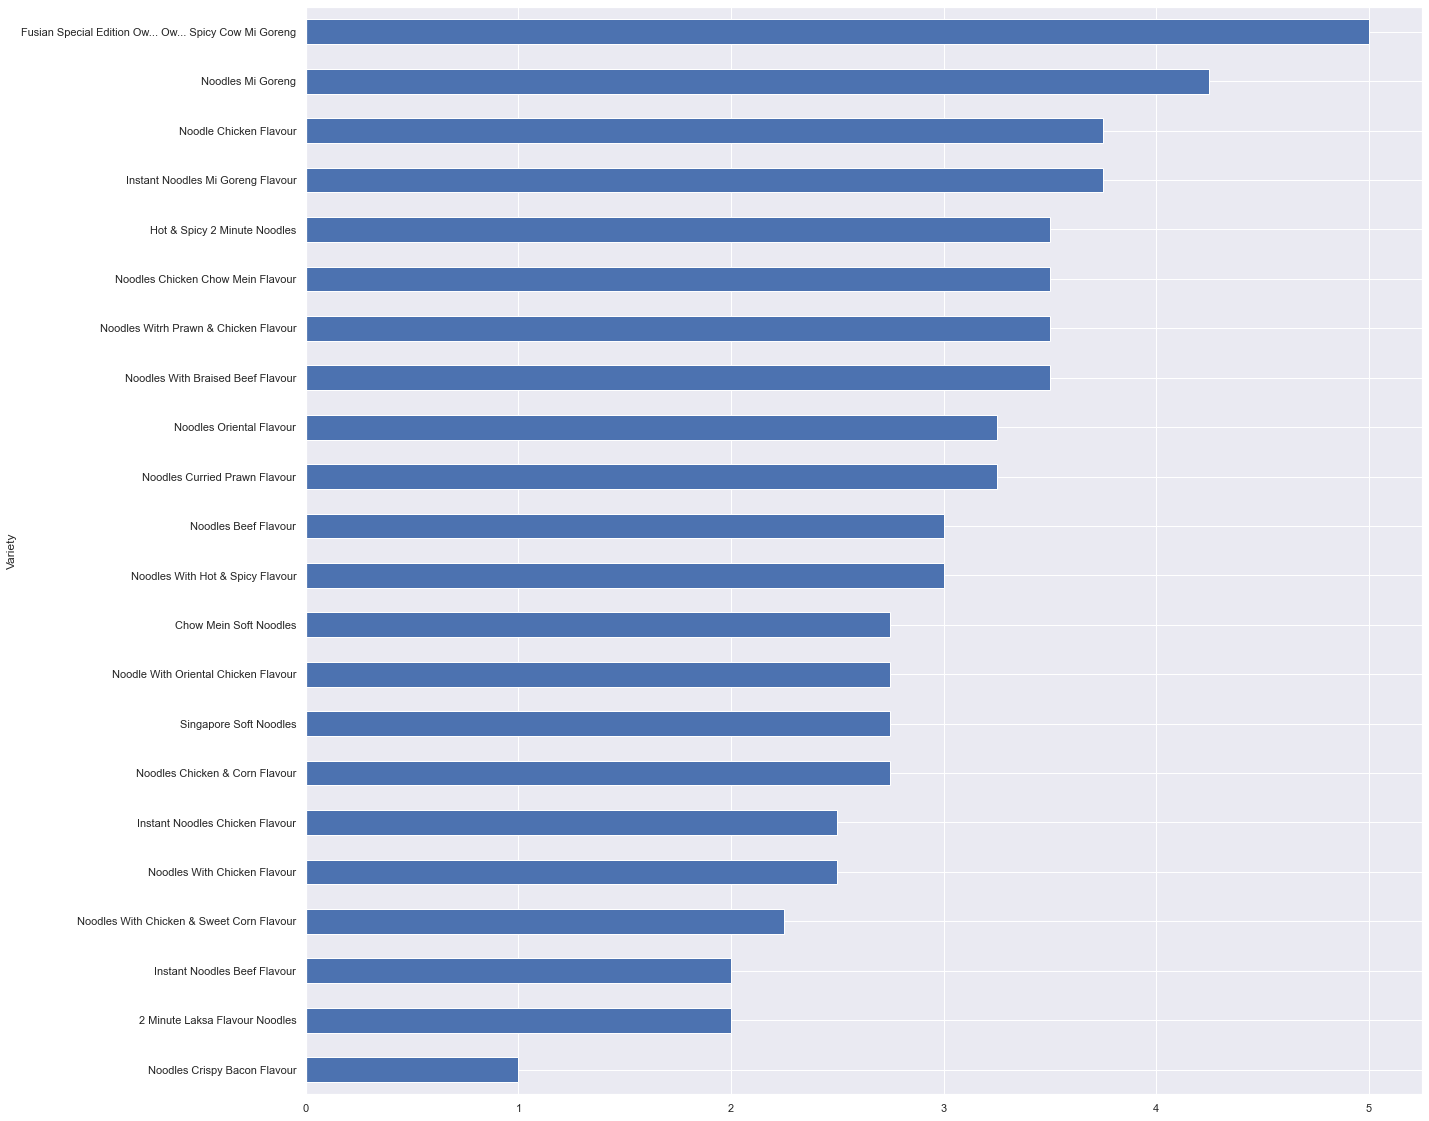

In [243]:
aussie= df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Australia"]
aussie.cleanstars.sort_values().plot(kind="barh")
aussie.head()

# Philiphines

Review #      Brand Style  \
Variety                                                                        
Supreme Jjamppong Korean Style Spicy Seafood Soup      1645  Lucky Me!  Bowl   
Supreme Seafood Flavor Big Cup                         1611  Lucky Me!  Bowl   
Special Instant Noodles Jjamppong Flavor               1532  Lucky Me!  Pack   
Special Instant sopas Chicken Flavor                   1531  Lucky Me!  Pack   
Spicy Beef Mami Instant Noodle Soup                    1530  Lucky Me!  Pack   

                                                       Country Stars Top Ten  \
Variety                                                                        
Supreme Jjamppong Korean Style Spicy Seafood Soup  Philippines  3.75     NaN   
Supreme Seafood Flavor Big Cup                     Philippines     4     NaN   
Special Instant Noodles Jjamppong Flavor           Philippines   4.5     NaN   
Special Instant sopas Chicken Flavor               Philippines  3.75     NaN   
Spicy Beef Mami Instant Noodle Soup                Philippines     4     NaN   

                                                   cleanstars  
Variety                                                        
Supreme Jjamppong Korean Style Spicy Seafood Soup        3.75  
Supreme Seafood Flavor Big Cup                           4.00  
Special Instant Noodles Jjamppong Flavor                 4.50  
Special Instant sopas Chicken Flavor                     3.75  
Spicy Beef Mami Instant Noodle Soup                      4.00

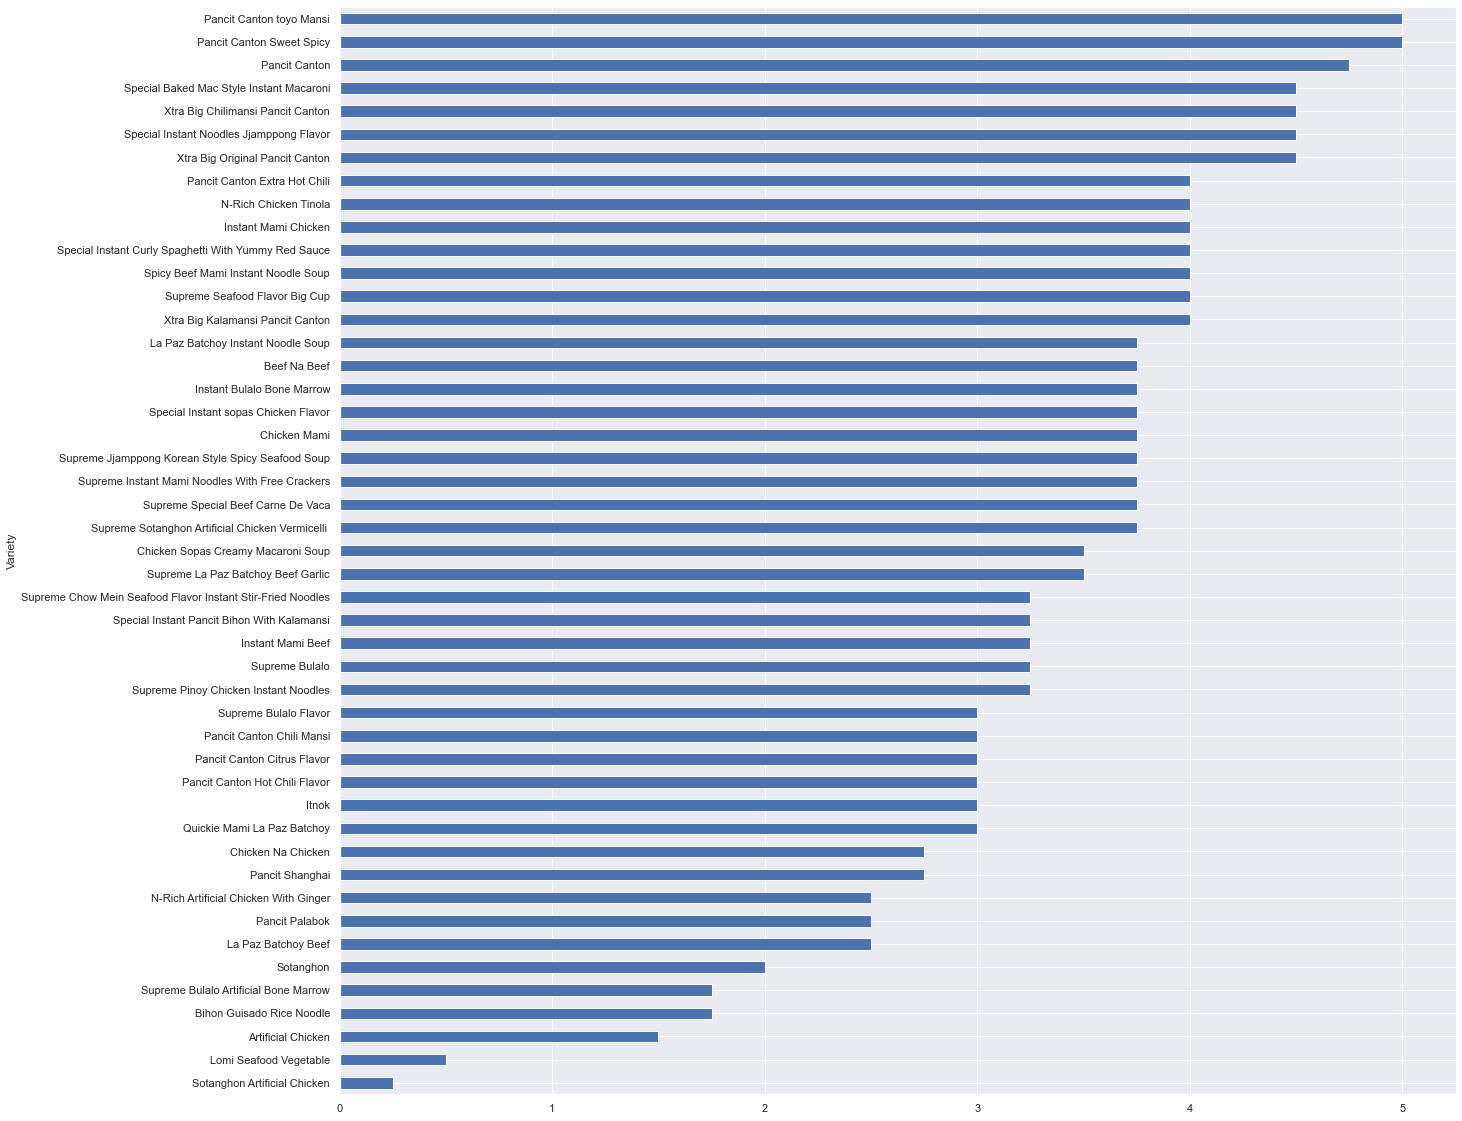

In [246]:
philip= df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Philippines"]
philip.cleanstars.sort_values().plot(kind="barh")
philip.head()

# India

Review #           Brand Style Country  \
Variety                                                                     
Cup Noodles Veggi Manchow              2685          Nissin   Cup   India   
Hot Heads Barbeque Pepper Noodles      2678           Maggi  Pack   India   
Schezwan Instant Noodles               2646  Ching's Secret  Pack   India   
Hot Heads Peri Peri Noodles            2639           Maggi  Pack   India   
Cup Noodles Mazedaar Masala            2626          Nissin   Cup   India   

                                  Stars Top Ten  cleanstars  
Variety                                                      
Cup Noodles Veggi Manchow           3.5     NaN         3.5  
Hot Heads Barbeque Pepper Noodles     0     NaN         0.0  
Schezwan Instant Noodles            3.5     NaN         3.5  
Hot Heads Peri Peri Noodles           4     NaN         4.0  
Cup Noodles Mazedaar Masala         3.5     NaN         3.5

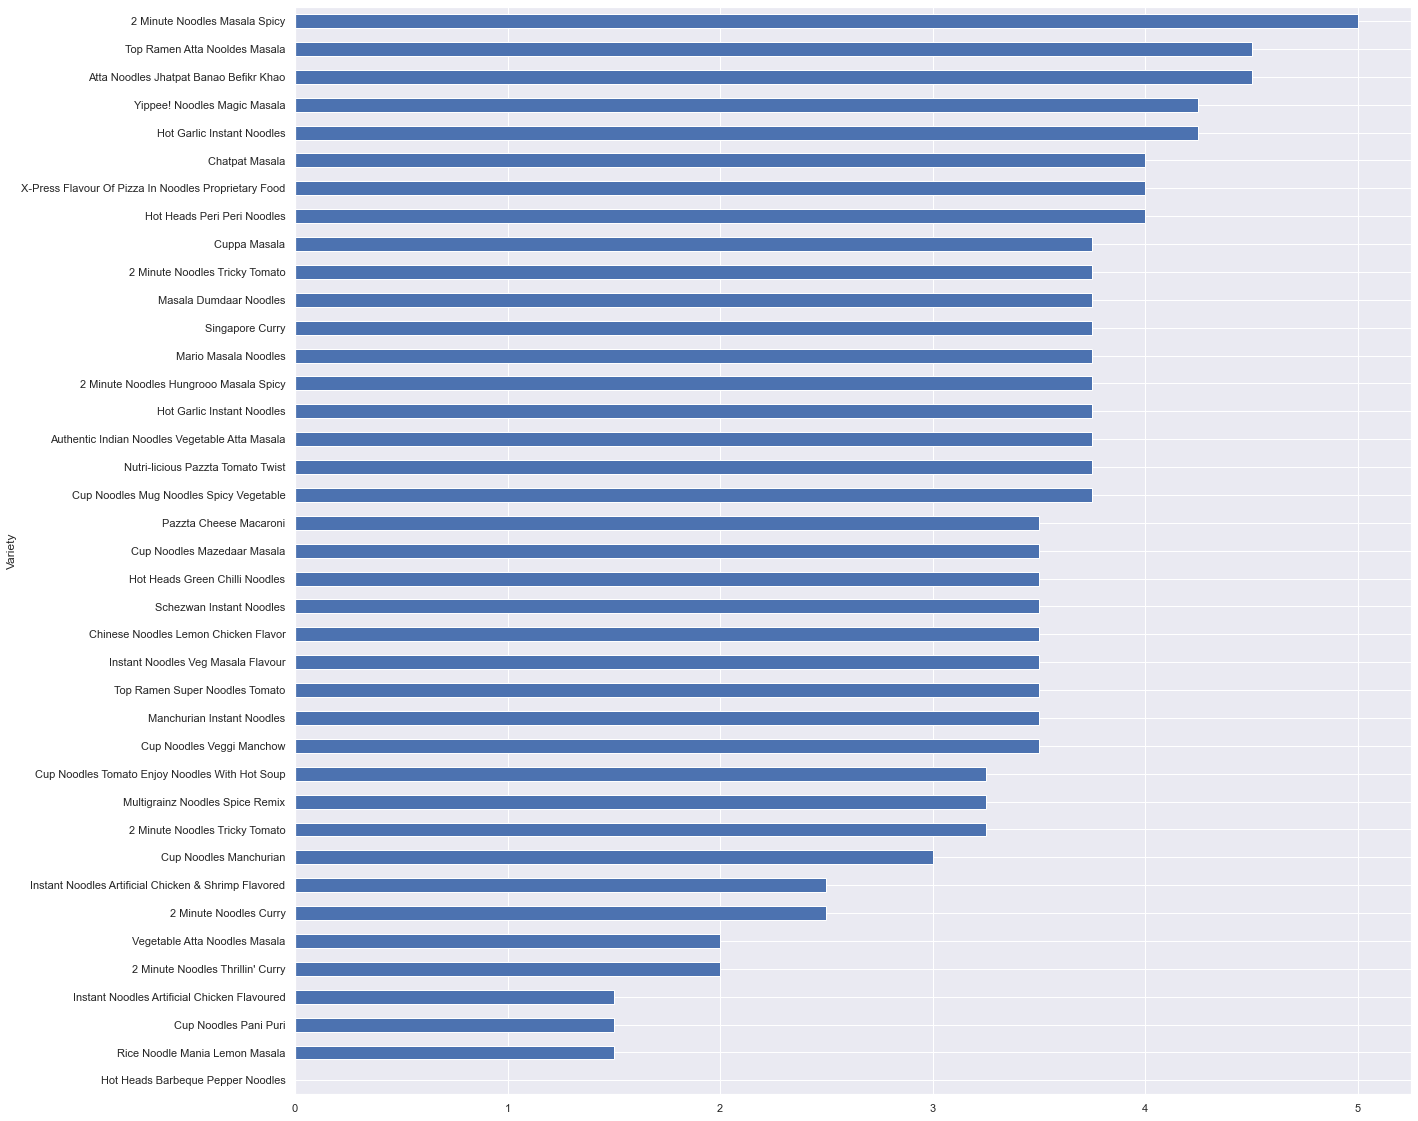

In [248]:
ind=df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "India"]
ind.cleanstars.sort_values().plot(kind="barh")
ind.head()

# United Kingdom

Review #              Brand Style Country Stars  \
Variety                                                                       
Penang Chicken Curry Laksa      2201  Mr. Lee's Noodles   Cup      UK     2   
Shaolin Monk Vegetables         2200  Mr. Lee's Noodles   Cup      UK     5   
Tai Chi Chicken                 2199  Mr. Lee's Noodles   Cup      UK     3   
Dragon Fire Mushroom            2198  Mr. Lee's Noodles   Cup      UK   2.5   
Hong Kong Street Beef           2197  Mr. Lee's Noodles   Cup      UK     5   

                           Top Ten  cleanstars  
Variety                                         
Penang Chicken Curry Laksa     NaN         2.0  
Shaolin Monk Vegetables        NaN         5.0  
Tai Chi Chicken                NaN         3.0  
Dragon Fire Mushroom           NaN         2.5  
Hong Kong Street Beef          NaN         5.0

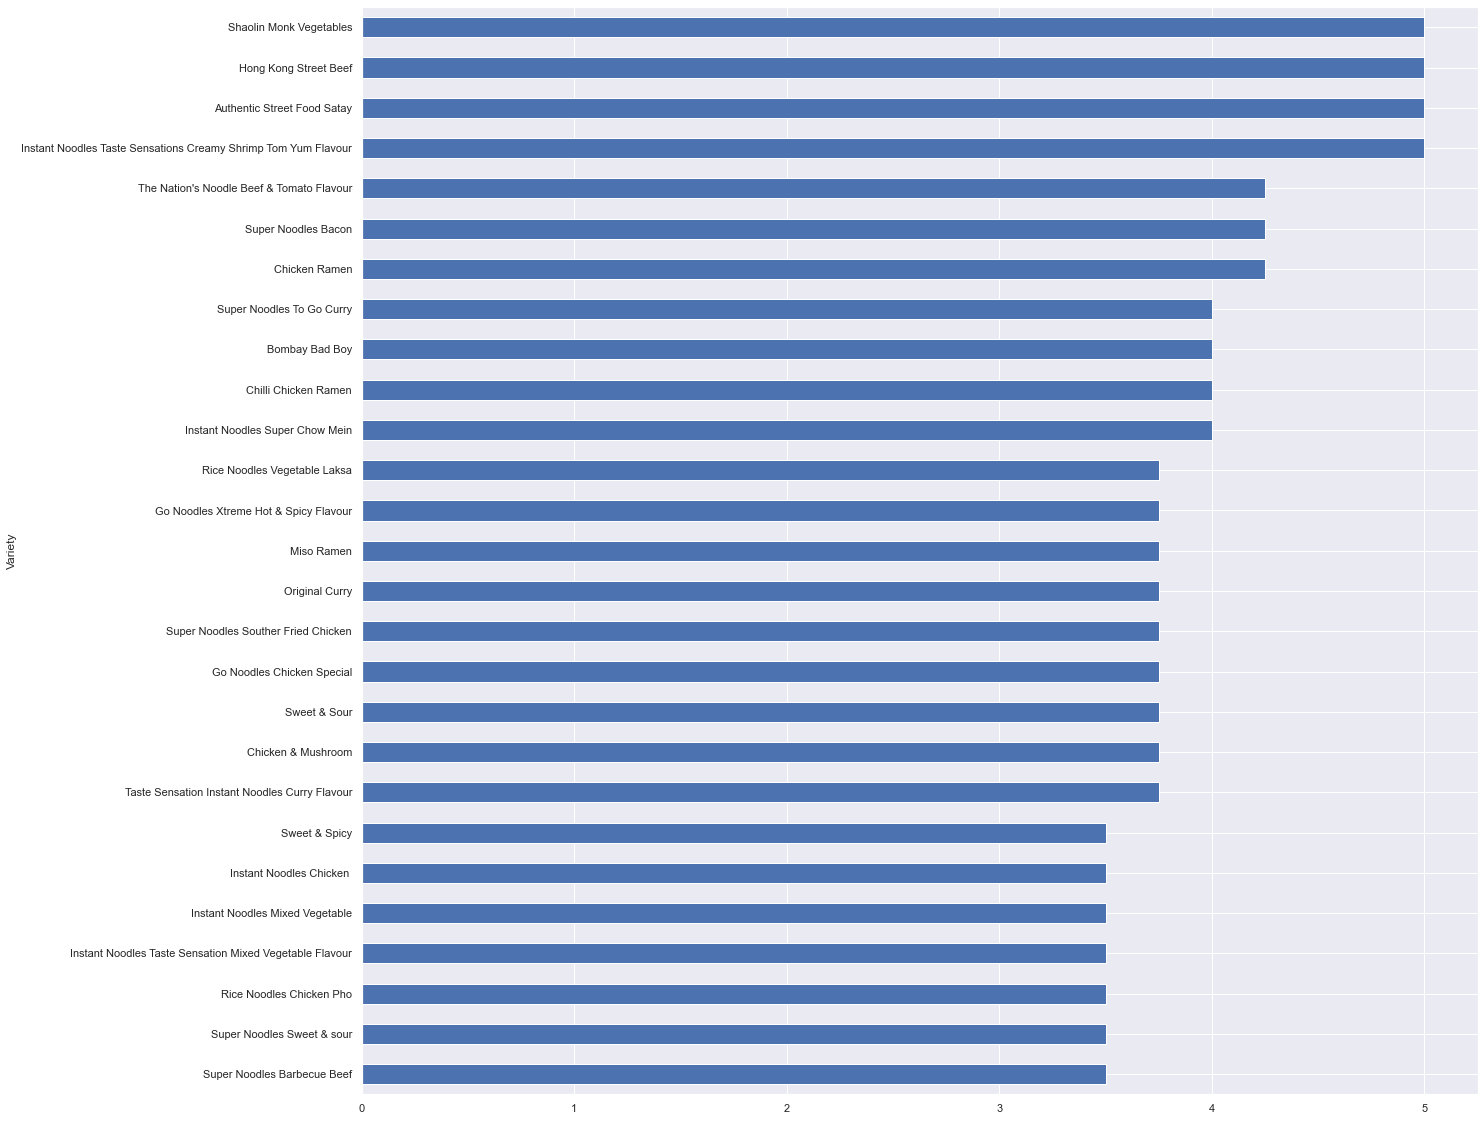

In [249]:
united_k= df_rater.set_index("Variety")[(df_rater.set_index("Variety")["Country"] == "UK")]
united_k[(united_k.cleanstars >= 3.5 )].cleanstars.sort_values().plot(kind="barh")
united_k.head()

# Mexico

Review #   Brand Style  \
Variety                                                                      
Cup Noodles Sopa Nissin Hot Sauce Con Camaron           2442  Nissin   Cup   
Cup Noodles Sopa Nissin Con Camaron Picante             2422  Nissin   Cup   
Cup Noodles Sopa Nissin Sabor A Pollo                   2344  Nissin   Cup   
Maxi Sopa Nissin Cuchareable Sabor A Jugo De Carne      2343  Nissin   Cup   
Sopa Nissin Sabor A Camaron Sopa Instantanea Ti...      2342  Nissin  Pack   

                                                   Country Stars Top Ten  \
Variety                                                                    
Cup Noodles Sopa Nissin Hot Sauce Con Camaron       Mexico   3.5     NaN   
Cup Noodles Sopa Nissin Con Camaron Picante         Mexico  3.25     NaN   
Cup Noodles Sopa Nissin Sabor A Pollo               Mexico   3.5     NaN   
Maxi Sopa Nissin Cuchareable Sabor A Jugo De Carne  Mexico  3.75     NaN   
Sopa Nissin Sabor A Camaron Sopa Instantanea Ti...  Mexico  3.75     NaN   

                                                    cleanstars  
Variety                                                         
Cup Noodles Sopa Nissin Hot Sauce Con Camaron             3.50  
Cup Noodles Sopa Nissin Con Camaron Picante               3.25  
Cup Noodles Sopa Nissin Sabor A Pollo                     3.50  
Maxi Sopa Nissin Cuchareable Sabor A Jugo De Carne        3.75  
Sopa Nissin Sabor A Camaron Sopa Instantanea Ti...        3.75

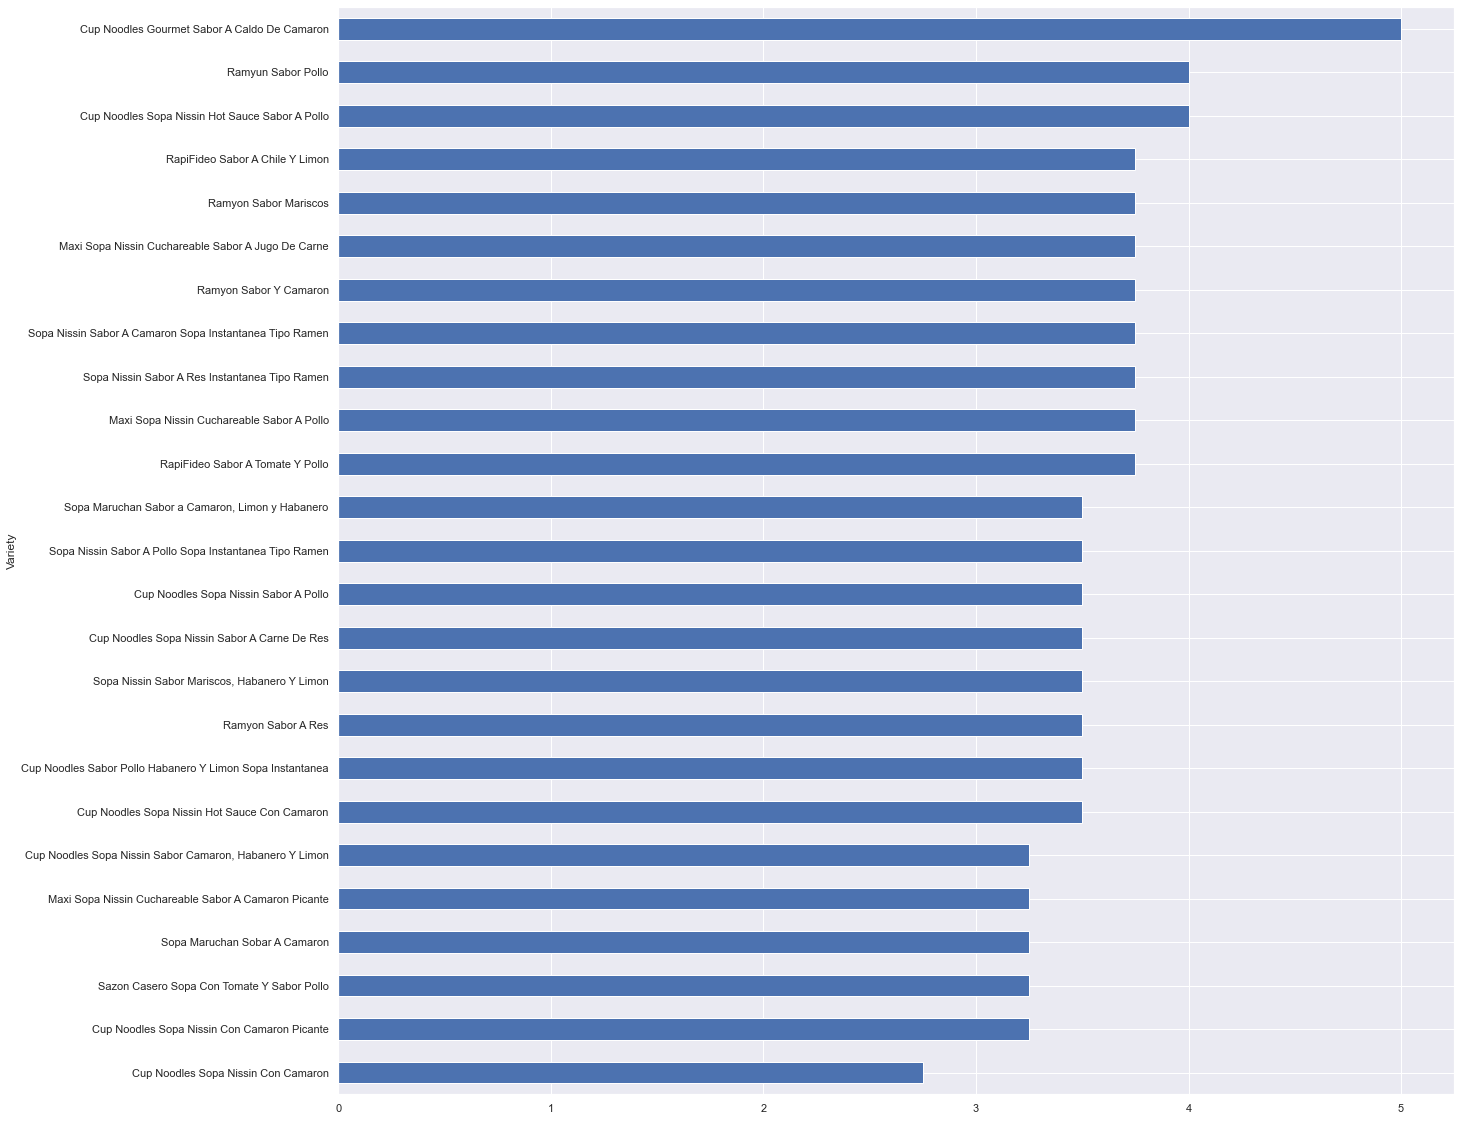

In [251]:
mexi=df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Mexico"]
mexi.cleanstars.sort_values().plot(kind="barh")
mexi.head()

# Top Ten Flavours Word Cloud

In [261]:
tops = df_rater[[type(x)is str for x in df_rater["Top Ten"]]]
greatest=tops[["#" in x for x in tops["Top Ten"]]]
greatest

Review #             Brand  \
736       1964              MAMA   
753       1947       Prima Taste   
775       1925             Prima   
793       1907       Prima Taste   
872       1828     Tseng Noodles   
1011      1689      Wugudaochang   
1062      1638  A-Sha Dry Noodle   
1083      1617           MyKuali   
1115      1585            CarJEN   
1179      1521          Maruchan   
1192      1508             Mamee   
1200      1500           MyKuali   
1229      1471              Mama   
1234      1466              Mama   
1350      1350             Mamee   
1370      1330   Sapporo Ichiban   
1392      1308          Nongshim   
1398      1302              Mama   
1429      1271       Prima Taste   
1502      1198     Samyang Foods   
1517      1183             Paldo   
1613      1087           MyKuali   
1708       992       Prima Taste   
1709       991       Prima Taste   
1766       934          Nongshim   
1877       823             Paldo   
1985       715           Indomie   
2092       608              Koka   
2122       578          Nongshim   
2266       434         Mi Sedaap   
2308       392            Nissin   
2309       391             Myojo   
2415       285              Doll   
2595       105           Indomie   
2653        47           Indomie   
2669        31             Myojo   
2687        13   Sapporo Ichiban   

                                                Variety Style        Country  \
736                Instant Noodles Coconut Milk Flavour  Pack        Myanmar   
753                  Singapore Laksa Wholegrain La Mian  Pack      Singapore   
775                   Juzz's Mee Creamy Chicken Flavour  Pack      Singapore   
793                  Singapore Curry Wholegrain La Mian  Pack      Singapore   
872                Scallion With Sichuan Pepper  Flavor  Pack         Taiwan   
1011    Tomato Beef Brisket Flavor Purple Potato Noodle  Pack          China   
1062  Veggie Noodle Tomato Noodle With Vine Ripened ...  Pack         Taiwan   
1083   Penang Hokkien Prawn Noodle (New Improved Taste)  Pack       Malaysia   
1115                                 Nyonya Curry Laksa  Pack       Malaysia   
1179                           Gotsumori Sauce Yakisoba  Tray          Japan   
1192               Chef Gold Recipe Mi Kari Seribu Rasa  Pack       Malaysia   
1200                    Penang Red Tom Yum Goong Noodle  Pack       Malaysia   
1229  Instant Noodles Shrimp Creamy Tom Yum Flavour ...  Pack       Thailand   
1234  Oriental Style Instant Noodles Green Curry Fla...  Pack       Thailand   
1350                           Chef Curry Laksa Flavour  Pack       Malaysia   
1370                     Otafuku Okonomi Sauce Yakisoba  Tray          Japan   
1392                            Soon Veggie Noodle Soup  Pack    South Korea   
1398     Instant Noodles Yentafo Tom Yum Mohfai Flavour  Pack       Thailand   
1429                      Singapore Chilli Crab La Mian  Pack      Singapore   
1502                    Maesaengyitangmyun Baked Noodle  Pack    South Korea   
1517                                      Cheese Noodle  Pack    South Korea   
1613                          Penang White Curry Noodle  Pack       Malaysia   
1708                            Singapore Laksa La Mian  Pack      Singapore   
1709                            Singapore Curry La Mian  Pack      Singapore   
1766                  Jinjja Jinjja Flamin' Hot & Nutty  Pack  United States   
1877                              Kokomen Spicy Chicken  Pack    South Korea   
1985                         Mi Goreng Rendang (Import)  Pack      Indonesia   
2092                                 Spicy Black Pepper  Pack      Singapore   
2122                                  Shin Ramyun Black  Pack    South Korea   
2266                                       Kari Spesial  Pack      Indonesia   
2308                           Yakisoba Noodles Karashi  Tray          Japan   
2309                    Hyoubanya No Chukasoba Oriental  Pack          Japan 

In [263]:
top = greatest['Variety']
top.head()

736    Instant Noodles Coconut Milk Flavour
753      Singapore Laksa Wholegrain La Mian
775       Juzz's Mee Creamy Chicken Flavour
793      Singapore Curry Wholegrain La Mian
872    Scallion With Sichuan Pepper  Flavor
Name: Variety, dtype: object

In [264]:
list_top = top.to_list()

In [266]:
top_ten= list_top[0]

top_ten=" ".join(review for review in list_top)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(top_ten)))

There are 1140 words in the combination of all reviewed ramen flavours.


In [288]:
stopwords_1=set(["Instant","Ramen","Flavored","Cup","Instant Noodle", "Noodle","Noodles","With","Flavour","Flavor","Bowl","Jumbo","Pack","soon"])

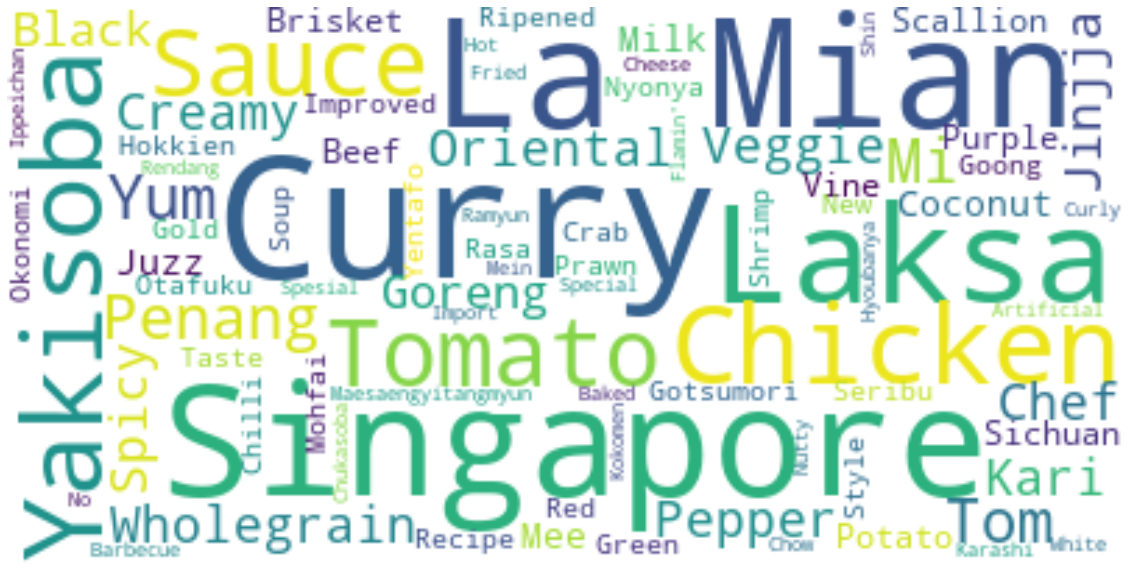

In [289]:
wordcloud = WordCloud(background_color="white", margin=0, min_font_size=1, max_font_size=60, max_words= 1140, min_word_length=0, stopwords=stopwords_1).generate(top_ten)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ramen Demands 

In [217]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [218]:
df_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
df_demands.head()




Countries/Region     2016     2017   2018   2019   2020
0            China  38520.0  38960.0  40250  41450  46350
1        Indonesia  13010.0  12620.0  12540  12520  12640
2         Vietname   4920.0   5060.0   5200   5430   7030
3            India   4270.0   5420.0   6060   6730   6730
4            Japan   5660.0   5660.0   5780   5630   5970

In [219]:
df_demands.set_index("Countries/Region", inplace=True)

In [220]:
for col in df_demands.columns:
    print(col)

2016
2017
2018
2019
2020


In [221]:
list(df_demands)

[2016, 2017, 2018, 2019, 2020]

In [222]:
df_demands.dtypes

2016    float64
2017    float64
2018      int64
2019      int64
2020      int64
dtype: object

In [223]:
#transposing the data (flipping the layout)
flip=df_demands.T

In [224]:
flip

Countries/Region    China  Indonesia  Vietname   India   Japan     USA  \
2016              38520.0    13010.0    4920.0  4270.0  5660.0  4120.0   
2017              38960.0    12620.0    5060.0  5420.0  5660.0  4130.0   
2018              40250.0    12540.0    5200.0  6060.0  5780.0  4520.0   
2019              41450.0    12520.0    5430.0  6730.0  5630.0  4630.0   
2020              46350.0    12640.0    7030.0  6730.0  5970.0  5050.0   

Countries/Region  Philippines  Republic of Korea  Thailand  Brazil  ...  \
2016                   3400.0             3830.0    3360.0  2370.0  ...   
2017                   3750.0             3740.0    3390.0  2250.0  ...   
2018                   3980.0             3820.0    3460.0  2390.0  ...   
2019                   3850.0             3900.0    3570.0  2450.0  ...   
2020                   4470.0             4130.0    3710.0  2720.0  ...   

Countries/Region  Chile  Denmark  Colombia  Belgium  Costa Rica  Finland  \
2016               30.0     10.0      10.0     10.0        10.0     10.0   
2017               20.0     10.0      10.0     10.0        10.0     10.0   
2018               30.0     10.0      20.0     10.0        10.0     10.0   
2019               30.0     20.0      20.0     10.0        10.0     10.0   
2020               20.0     20.0      20.0     20.0        10.0     10.0   

Countries/Region  Switzerland  Argentina  Others     Total  
2016                     10.0       10.0  1070.0   97520.0  
2017                     10.0       10.0  1310.0  100110.0  
2018                     10.0       10.0  1010.0  103620.0  
2019                     10.0       10.0   860.0  106420.0  
2020                     10.0        4.0   800.0  116560.0  

[5 rows x 57 columns]

In [225]:
#list of columns 
for dt in flip:
    print(dt)

China
Indonesia
Vietname
India
Japan
USA
Philippines
Republic of Korea
Thailand
Brazil
Nigeria
Russia
Malaysia
Nepal
Mexico
Taiwan
Saudi Arabia
Myanmar
Australia
UK
Cambodia
Bangladesh
Egypt
South Africa
Poland
Ukraine
Germany
Kazakhstan
Guatemala
Pakistan
Canada
Sri Lanka
Turkey
Peru
Singapore
Uzbekistan
Ethiopia
France
New Zealand
Kenya
Spain
Czech Republic
Iran
Sweden
Netherlands
Hungary
Italy
Chile
Denmark
Colombia
Belgium
Costa Rica
Finland
Switzerland
Argentina
Others
Total


In [226]:
#Choosing the countries to display in the Heatmap
heat_data = flip[['Australia',"Philippines","India","UK","Mexico"]]

<AxesSubplot:xlabel='Countries/Region'>

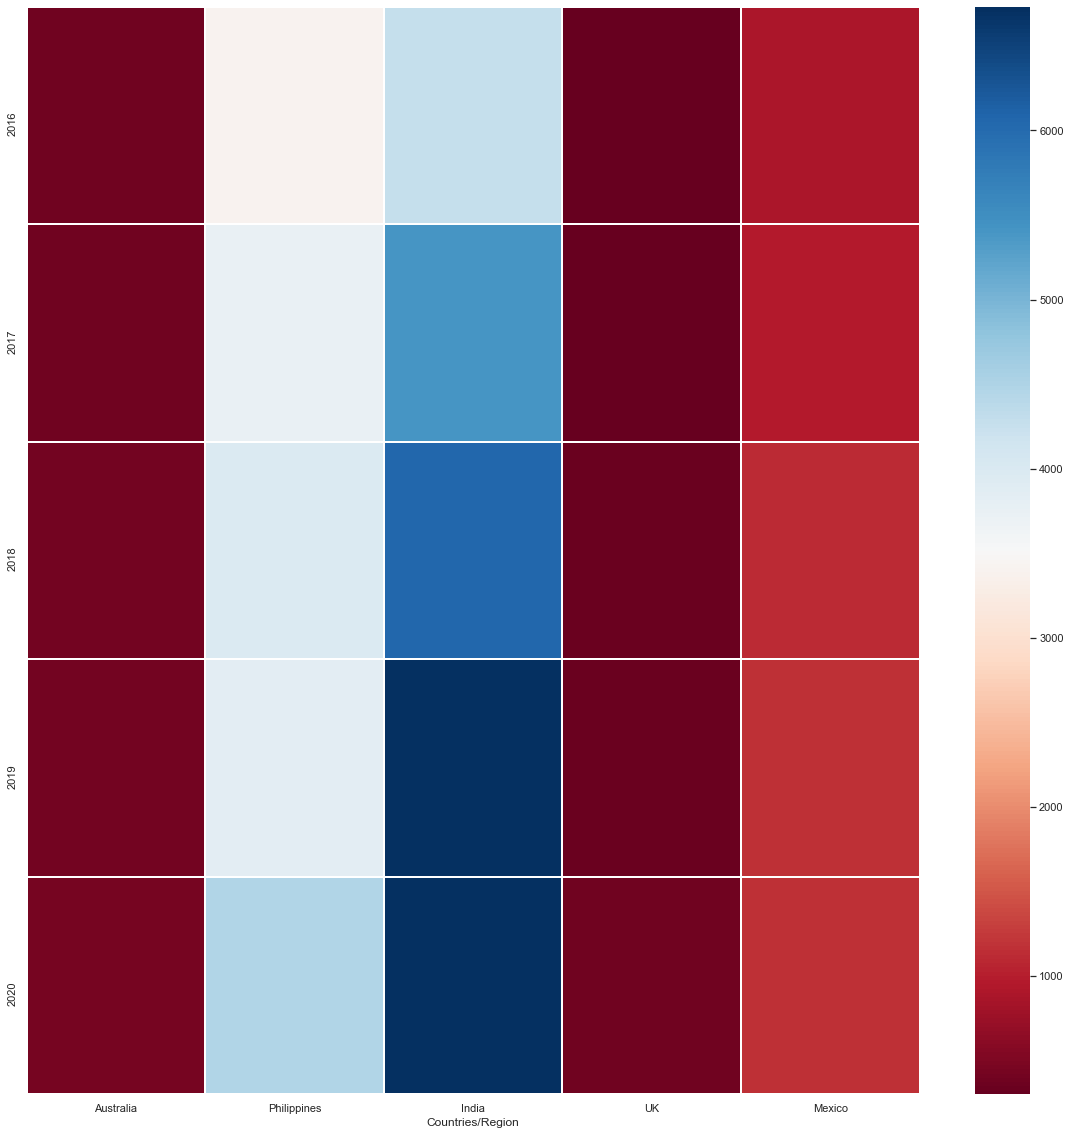

In [227]:
#Display Heat Map 
sns.heatmap(heat_data,linewidths=1, cmap="RdBu")

In [228]:
#Bar Graph 
sns.set_theme(style="darkgrid")


<AxesSubplot:xlabel='Countries/Region'>

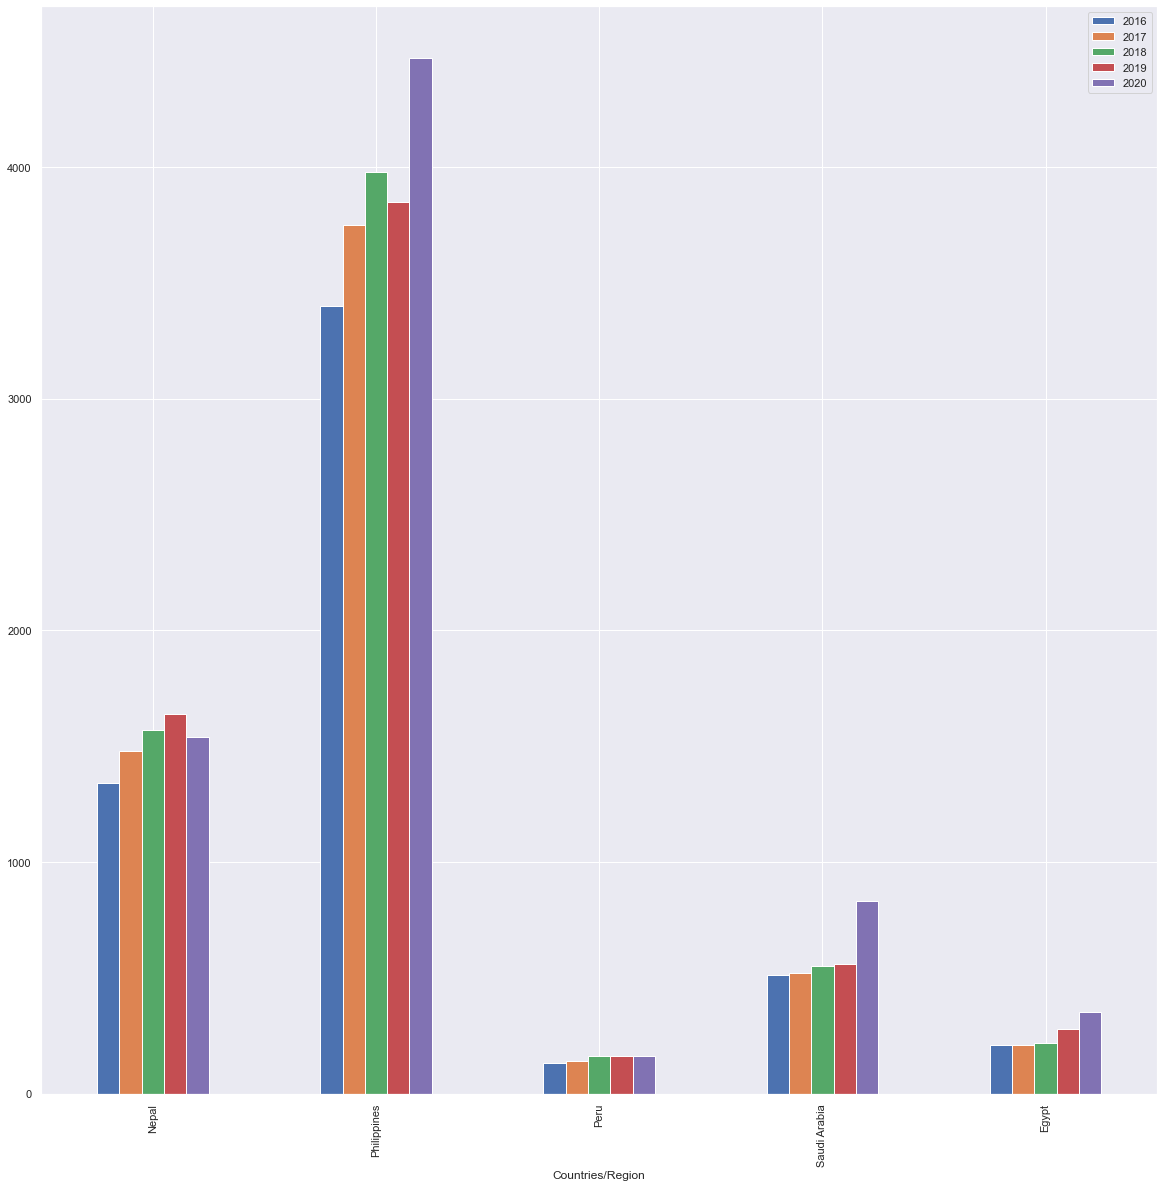

In [229]:
bar= df_demands.sample(5)
bar.plot(kind="bar")